Importing Libraries

In [1]:
import pyclesperanto_prototype as cle

from napari_workflows import Workflow
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import label

Creation of a napari workflow object ```w``` and adding a downscaling and denoising step to the workflow

In [2]:
w = Workflow()

# define downscaling
w.set('scaled',cle.scale, 'input', factor_x = 0.5, factor_y = 0.5, factor_z = 0.5, auto_size = True)

# define denoising
w.set("denoised", cle.gaussian_blur, "scaled", 
      sigma_x=2, sigma_y=2, sigma_z=2)

Each workflow step is stored in a dictionary with the key we define as the first parameter for the set function. We can look at the different steps in the workflow by printing our workflow object ```w``` or take an in depth look at the dictionary where the workflow steps are stored with ```_tasks```

In [3]:
print(w)

Workflow:
scaled <- (<function scale at 0x000001F4194C7130>, 'input', None, 0.5, 0.5, 0.5, True, False, True)
denoised <- (<function gaussian_blur at 0x000001F4002F7520>, 'scaled', None, 2, 2, 2)



In [4]:
w._tasks

{'scaled': (<function pyclesperanto_prototype.scale(source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None, factor_x: float = 1, factor_y: float = 1, factor_z: float = 1, centered: bool = True, linear_interpolation: bool = False, auto_size: bool = False) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]>,
  'input',
  None,
  0.5,
  0.5,
  0.5,
  True,
  False,
  True),
 'denoised': (<function pyclesperanto_prototype.gaussian_blur(source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyop

Since we have only set workflow steps and no input image we cannot look at what the workflow is doing. We need to load some data and add it to the workflow  and specify it as input:

In [5]:
from skimage import io
location = 'D:/Uni/Hackathon/neotosis#/'
image = io.imread(location + 'netosis_ch2.tif')

w.set('input',image)

Now we can look at what the workflow does up to a certain step with the ```get``` function. The function internally calls dask get, which means only the steps needed to compute the specified result will be carried out:

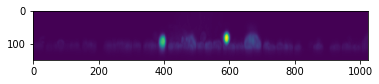

In [6]:
output = w.get('denoised')
cle.imshow(output)

To complete this demo workflow we will add the deskewing operation to the workflow:

In [7]:
w.set('deskewed', cle.deskew_y, 'denoised', 
      angle_in_degrees=30, voxel_size_x=0.145, 
      voxel_size_y=0.145, voxel_size_z=0.3)

Finally we can retrieve the deskewed/final image of the workflow with the ```get``` function

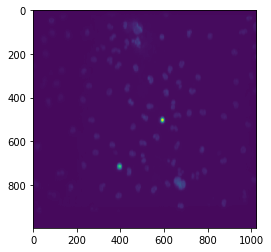

In [8]:
deskewed = w.get('deskewed')
cle.imshow(deskewed)